<a href="https://colab.research.google.com/github/GKS07/AUDIO_/blob/main/Speech_Emotion_Recognition(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Speech Emotion Recognition**

Speech emotion Recognition commonly referred as SER is a process of processing the Speech signals to classify the state of the emotion of the speaker.<br>
In this notebook i'm going to build a model that can classify the speech to a particular emotion.<br>
The process that i will do to make a model:

  *   Preprocessing
  *   Augmenting
  *   build model
  *   model evaluation







**Application of Speech Emotion Recognition**<br>

  1.   <b>Human-Machine Interaction:</b> <b>SER can help in improving the intercation between human and computers like, it can enhance the user experience in virtual assistants, gaming, and other human-computer interfaces by adapting their responses based on the user’s emotional state.</b>
  2.  Market Research and customer segmentation: Companies can use the SER to analyse the customer feedback to tailor the company services and products to meet consumer emotional prefrences.

**Datasets used for this project**: i'll be using the dataset from the kaggle.[Dataset](https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en/data)<br>
**Downloding the data**

In [ ]:
# uploading the kaggle jason file

from google.colab import files
files.upload()

# copying the kaggle file

!mkdir ~/.kaggle # nmaking the folder

! cp kaggle.json ~/.kaggle/  #copy the file

#changing the permission.
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
#changing the current directory
os.chdir('/content/drive/MyDrive')

# getting the current directory
os.getcwd()

# making the folder
!mkdir Speech_Emotion_Recognition

# downloading the data from kaggle
!kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en


mkdir: cannot create directory ‘Speech_Emotion_Recognition’: File exists
speech-emotion-recognition-en.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzipping the data
!unzip speech-emotion-recognition-en.zip -d Speech_Emotion_Recognition

**Importing Libraries**

In [ ]:
#tensorflow-io package provides quite a few useful audio-related APIs
#that helps easing the preparation and augmentation of audio data.

!pip install tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 17.1 MB/s eta 0:00:00


In [ ]:
import os
from tqdm.notebook import tqdm
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_io as tfio
from IPython.display import Audio

# **Preprocessing the data**

Our data contains 4 folder and each folder have audio file with .wav extension and part of file name refers to a emotion of the speech. so i need to preprocess them and merge them in a single file.<br>

Information about data.

Ravdess:

Here is the filename identifiers as per the official RAVDESS website:
<br>
<ul>
<li>Modality (01 = full-AV, 02 = video-only, 03 = audio-only).</li>
<li>Vocal channel (01 = speech, 02 = song).</li>
<li>Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).</li>
<li>Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.</li>
<li>Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").</li>
<li>Repetition (01 = 1st repetition, 02 = 2nd repetition).</li>
<li>Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).</li>
</ul><br><br>
So, here's an example of an audio filename. 02-01-06-01-02-01-12.wav This means the meta data for the audio file is:
<ul>
<li>Video-only (02)</li>
<li>Speech (01)</li>
<li>Fearful (06)</li>
<li>Normal intensity (01)</li>
<li>Statement "dogs" (02)</li>
<li>1st Repetition (01)</li>
<li>12th Actor (12) - Female (as the actor ID number is even)</li>
</ul>
<br><br>
Crema:

The third component is responsible for the emotion label:
<ul>
<li>SAD - sadness;</li>
<li>ANG - angry;</li>
<li>DIS - disgust;</li>
<li>FEA - fear;</li>
<li>HAP - happy;</li>
<li>NEU - neutral.</li>
</ul>
Tess:

Very similar to Crema - label of emotion is contained in the name of file.

Savee:

The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:
<ul>
<li>'a' = 'anger'</li>
<li>'d' = 'disgust'</li>
<li>'f' = 'fear'</li>
<li>'h' = 'happiness'</li>
<li>'n' = 'neutral'</li>
<li>'sa' = 'sadness'</li>
<li>'su' = 'surprise'</li>
</ul>

In [ ]:
#preprocessing the data from Crema folder

crema_dir = '/content/drive/MyDrive/Speech_Emotion_Recognition/Crema'

emotion = []
audio = []
for aud in tqdm(os.listdir(crema_dir)):
  path = os.path.join(crema_dir, aud)# path of the audio file
  audio.append(path)# storing the path to audio list

  #splitting the aud to get emotion of the audio file as per meta data.
  file_ = aud.split('_')
  if file_[2] == 'SAD':
      emotion.append('sad')
  elif file_[2] == 'ANG':
      emotion.append('angry')
  elif file_[2] == 'DIS':
      emotion.append('disgust')
  elif file_[2] == 'FEA':
      emotion.append('fear')
  elif file_[2] == 'HAP':
      emotion.append('happy')
  elif file_[2] == 'NEU':
      emotion.append('neutral')
  else:
      emotion.append('Unknown')

  0%|          | 0/7442 [00:00<?, ?it/s]

In [ ]:
#making a dataframe for the Cream data

crem_dict = {"Emotion":emotion, "File_Path": audio}#creating a dictionary

Crema = pd.DataFrame(crem_dict)

In [ ]:
Crema.head()

Emotion                                          File_Path
0  disgust  /content/drive/MyDrive/Speech_Emotion_Recognit...
1    angry  /content/drive/MyDrive/Speech_Emotion_Recognit...
2  neutral  /content/drive/MyDrive/Speech_Emotion_Recognit...
3    angry  /content/drive/MyDrive/Speech_Emotion_Recognit...
4  disgust  /content/drive/MyDrive/Speech_Emotion_Recognit...

In [ ]:
Crema.shape

(7442, 2)

In [ ]:
#preprocessing the data from Ravdess folder

rav_dir = '/content/drive/MyDrive/Speech_Emotion_Recognition/Ravdess/audio_speech_actors_01-24'

emotion2 = []
audio_path = []

emotion_dict = {'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' :'angry', '06' : 'fear', '07' : 'disgust', '08' : 'surprise'}

#this dir have 24 subfolder
for sub_dir in tqdm(os.listdir(rav_dir)):
  for sub_dir2 in tqdm(os.listdir(os.path.join(rav_dir, sub_dir))):
    file_name = sub_dir2.split('.')[0]
    file_name = file_name.split('-')
    emotion2.append(emotion_dict[file_name[2]])
    audio_path.append(os.path.join(os.path.join(rav_dir, sub_dir), sub_dir2))

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

In [ ]:
# creating a dataframe

rav_dict = {"Emotion":emotion2, "File_Path": audio_path}#creating a dictionary

Ravdess = pd.DataFrame(rav_dict)

In [ ]:
Ravdess.head()

Emotion                                          File_Path
0     sad  /content/drive/MyDrive/Speech_Emotion_Recognit...
1    calm  /content/drive/MyDrive/Speech_Emotion_Recognit...
2   happy  /content/drive/MyDrive/Speech_Emotion_Recognit...
3   happy  /content/drive/MyDrive/Speech_Emotion_Recognit...
4     sad  /content/drive/MyDrive/Speech_Emotion_Recognit...

In [ ]:
Ravdess.shape

(1440, 2)

In [ ]:
#preprocessing the data from Savee folder

savee_dir = '/content/drive/MyDrive/Speech_Emotion_Recognition/Savee'

sav_dict = {'a' : 'angry',
            'd' : 'disgust',
            'f' : 'fear',
            'h' : 'happy',
            'n' : 'neutral',
            'sa' : 'sad',
            'su' : 'surprise'}

audio_path2 = []
emotion3 = []

for audio_file in tqdm(os.listdir(savee_dir)):
  audio_path2.append(os.path.join(savee_dir, audio_file))
  audio_f = audio_file.split('_')[1]
  audio_f = audio_f[:-6]
  emotion3.append(sav_dict[audio_f])

  0%|          | 0/480 [00:00<?, ?it/s]

In [ ]:
#creating a data frame

savee_dict = {"Emotion":emotion3, "File_Path": audio_path2}#creating a dictionary

Savee = pd.DataFrame(savee_dict)

In [ ]:
Savee.head()

Emotion                                          File_Path
0   angry  /content/drive/MyDrive/Speech_Emotion_Recognit...
1   angry  /content/drive/MyDrive/Speech_Emotion_Recognit...
2   angry  /content/drive/MyDrive/Speech_Emotion_Recognit...
3   angry  /content/drive/MyDrive/Speech_Emotion_Recognit...
4   angry  /content/drive/MyDrive/Speech_Emotion_Recognit...

In [ ]:
Savee.shape

(480, 2)

In [ ]:
#preprocessing the data from Tess folder

Tes_dir = '/content/drive/MyDrive/Speech_Emotion_Recognition/Tess'

audio_path3 = []
emotion4 = []

for sub_folder in tqdm(os.listdir(Tes_dir)):
  for sub_folder2 in tqdm(os.listdir(os.path.join(Tes_dir, sub_folder))):
    audio_path3.append(os.path.join(os.path.join(Tes_dir, sub_folder), sub_folder2))
    aud_fil = sub_folder2.split('.')[0]
    aud_fil = aud_fil.split('_')
    aud_fil = aud_fil[2]
    if aud_fil == 'ps':
      emotion4.append('surprise')
    else:
      emotion4.append(aud_fil)

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
#creating a data frame

tes_dict = {"Emotion":emotion4, "File_Path": audio_path3}#creating a dictionary

Tess = pd.DataFrame(tes_dict)

In [ ]:
Tess.head()

Emotion                                          File_Path
0    fear  /content/drive/MyDrive/Speech_Emotion_Recognit...
1    fear  /content/drive/MyDrive/Speech_Emotion_Recognit...
2    fear  /content/drive/MyDrive/Speech_Emotion_Recognit...
3    fear  /content/drive/MyDrive/Speech_Emotion_Recognit...
4    fear  /content/drive/MyDrive/Speech_Emotion_Recognit...

In [ ]:
Tess.shape

(2800, 2)

In [ ]:
#concanating all the dataframe into one

Data = pd.concat([Crema, Ravdess, Savee, Tess], axis = 0)
#saving the csv file in drive
os.chdir('/content/drive/MyDrive/Speech_Emotion_Recognition')
Data.to_csv("Speech_emotion_Recognition2.csv",index=False)
Data.head()

Emotion                                          File_Path
0  disgust  /content/drive/MyDrive/Speech_Emotion_Recognit...
1    angry  /content/drive/MyDrive/Speech_Emotion_Recognit...
2  neutral  /content/drive/MyDrive/Speech_Emotion_Recognit...
3    angry  /content/drive/MyDrive/Speech_Emotion_Recognit...
4  disgust  /content/drive/MyDrive/Speech_Emotion_Recognit...

In [ ]:
emotion_data = pd.read_csv('/content/drive/MyDrive/Speech_Emotion_Recognition/Speech_emotion_Recognition2.csv')
emotion_data.head(6)

Emotion                                          File_Path
0  disgust  /content/drive/MyDrive/Speech_Emotion_Recognit...
1    angry  /content/drive/MyDrive/Speech_Emotion_Recognit...
2  neutral  /content/drive/MyDrive/Speech_Emotion_Recognit...
3    angry  /content/drive/MyDrive/Speech_Emotion_Recognit...
4  disgust  /content/drive/MyDrive/Speech_Emotion_Recognit...
5  disgust  /content/drive/MyDrive/Speech_Emotion_Recognit...

In [ ]:
emotion_data.shape

(12162, 2)

**Data Visualization**

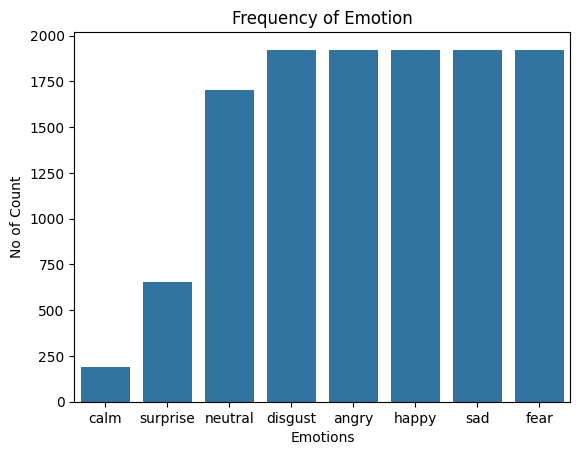

In [ ]:
sns.countplot(data = emotion_data, x = 'Emotion', order= emotion_data['Emotion'].value_counts(ascending=True).index)
plt.xlabel('Emotions')
plt.ylabel('No of Count')
plt.title('Frequency of Emotion')
plt.show()

form above plot we can clearly see the data is not balanced. so it may be possible that our trained model predict other emotions on calm and surprise audio.

**Displaying the Waveplot and Spectrogram for each emotion category**


*  Waveplots - Waveplots let us know the loudness of the audio at a given time.

*  Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [ ]:
# function for displaying the waveform and Spectrogram

def waveform_and_spectrogram(audio_file, label):
  audio = tfio.audio.AudioIOTensor(audio_file, dtype=tf.float32)# read the audio file
  audio_tens = audio.to_tensor()# convert the audio data into tensor
  # remove last dimension
  audio_tens = tf.squeeze(audio_tens, axis=[-1])

  #playing the audio


  #creating teh waveform
  waveform = tf.cast(audio_tens, tf.float32) / 32768.0

  #creating the spectrogram
  spectrogram = tfio.audio.spectrogram(
    waveform, nfft=512, window=512, stride=256) #api which converts waveforms into spectrograms

  fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (7,10))

  ax[0].plot(waveform.numpy())
  ax[1].imshow(tf.math.log(spectrogram).numpy())

  ax[0].set_title('Waveform')
  ax[1].set_title('Spectrogram')

  fig.suptitle(f'Waveform and Spectrogram for Emotion: {label}')
  plt. subplots_adjust(wspace=0.4,
                    hspace=0.4)
  plt.show()

  aud = Audio(waveform.numpy(), rate=audio.rate.numpy())

  print('Listen Audio:')

  return aud


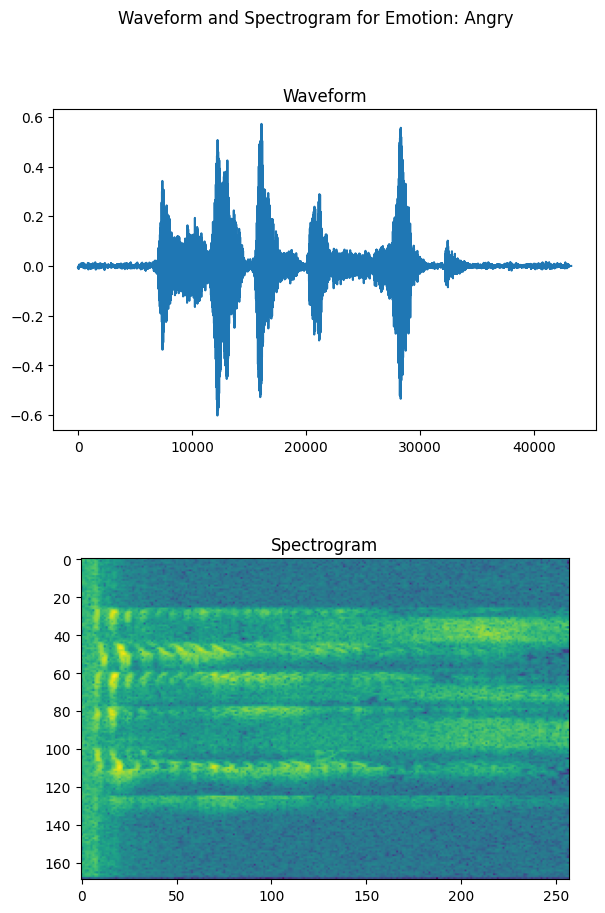

Listen Audio:


In [ ]:
#Displaying the Waveform and Spectrogram for Angry

file_ = emotion_data.loc[emotion_data['Emotion'] == 'angry', 'File_Path'][:1]

#calling the function
waveform_and_spectrogram(file_, 'Angry')

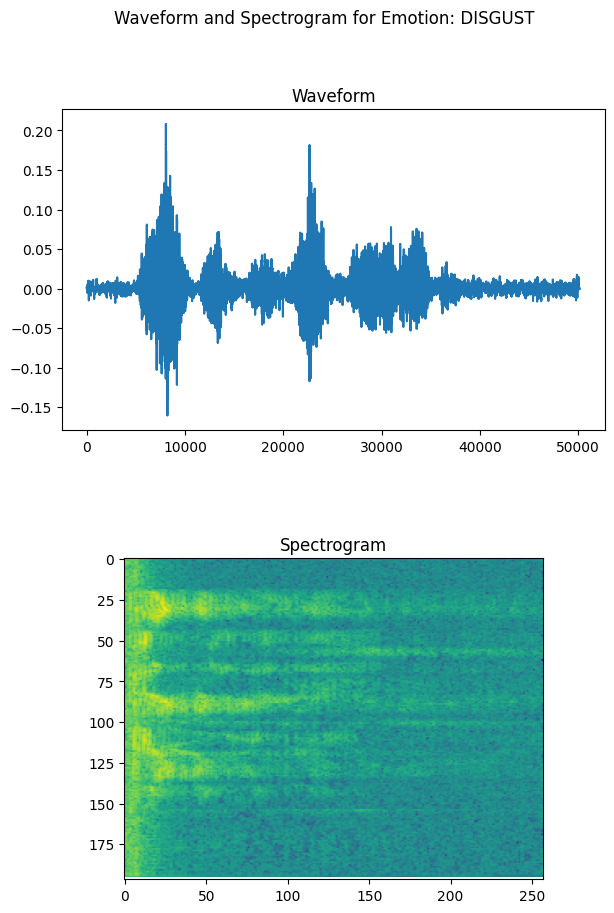

Listen Audio:


In [ ]:
#Displaying the Waveform and Spectrogram for Disgust

file_ = emotion_data.loc[emotion_data['Emotion'] == 'disgust', 'File_Path'][:1]

#calling the function
waveform_and_spectrogram(file_, 'DISGUST')

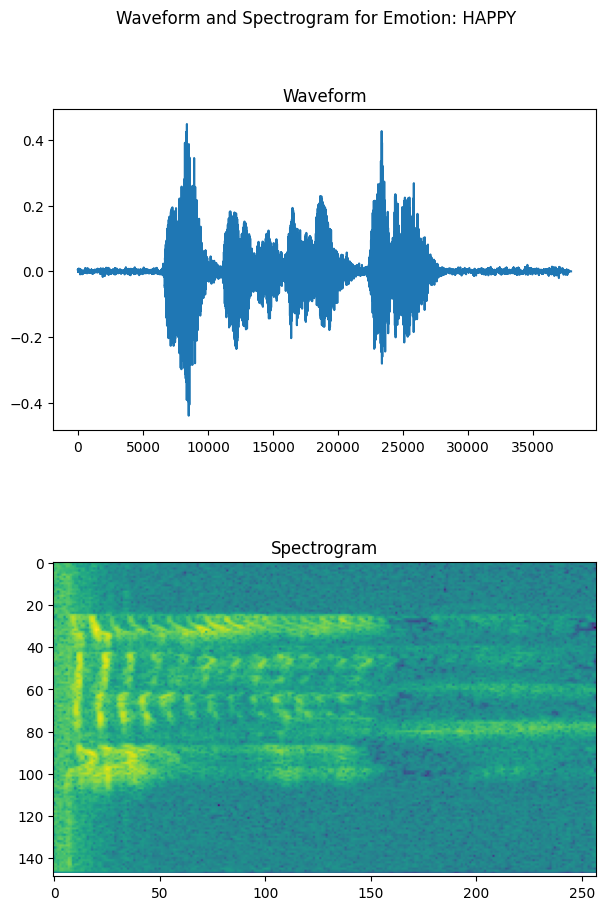

Listen Audio:


In [ ]:
#Displaying the Waveform and Spectrogram for Happy

file_ = emotion_data.loc[emotion_data['Emotion'] == 'happy', 'File_Path'][:1]

#calling the function
waveform_and_spectrogram(file_, 'HAPPY')

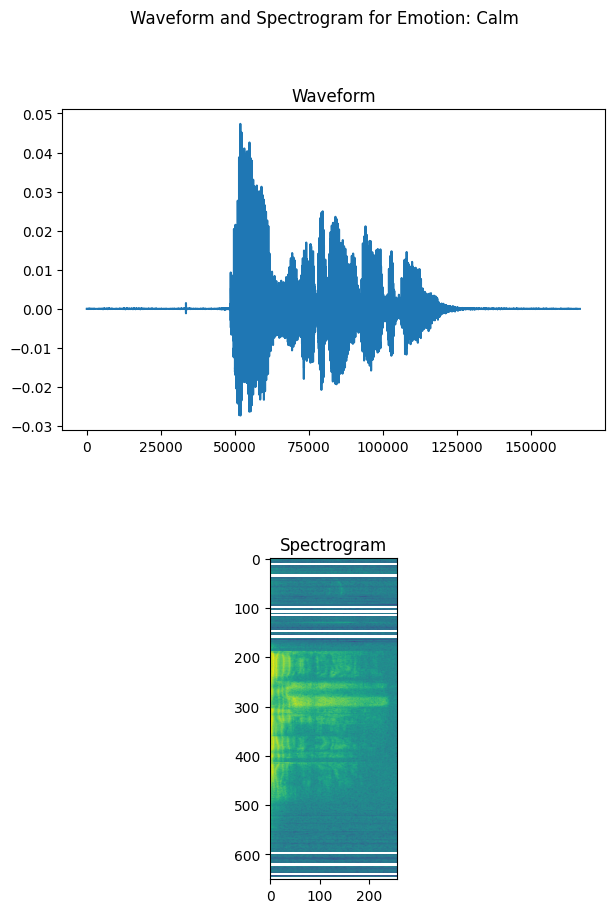

Listen Audio:


In [ ]:
#Displaying the Waveform and Spectrogram for Calm

file_ = emotion_data.loc[emotion_data['Emotion'] == 'calm', 'File_Path'][:1]

#calling the function
waveform_and_spectrogram(file_, 'Calm')

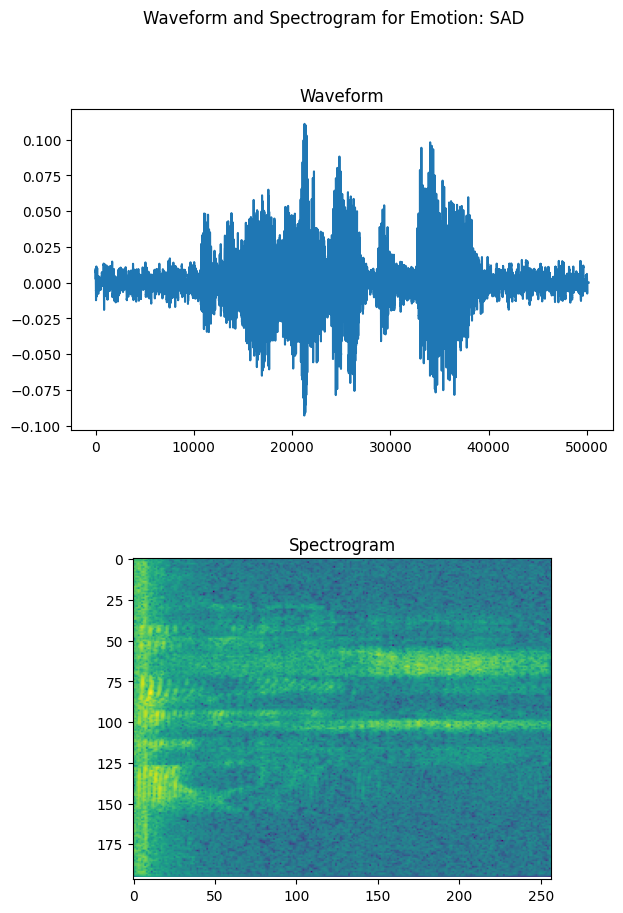

Listen Audio:


In [ ]:
#Displaying the Waveform and Spectrogram for sad

file_ = emotion_data.loc[emotion_data['Emotion'] == 'sad', 'File_Path'][:1]

#calling the function
waveform_and_spectrogram(file_, 'SAD')

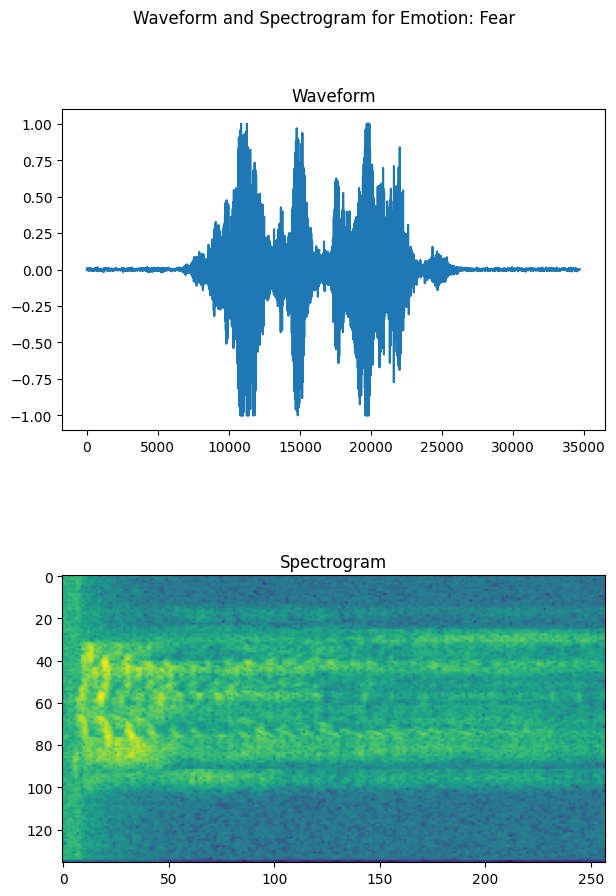

Listen Audio:


In [ ]:
#Displaying the Waveform and Spectrogram for Fear

file_ = emotion_data.loc[emotion_data['Emotion'] == 'fear', 'File_Path'][:1]

#calling the function
waveform_and_spectrogram(file_, 'Fear')

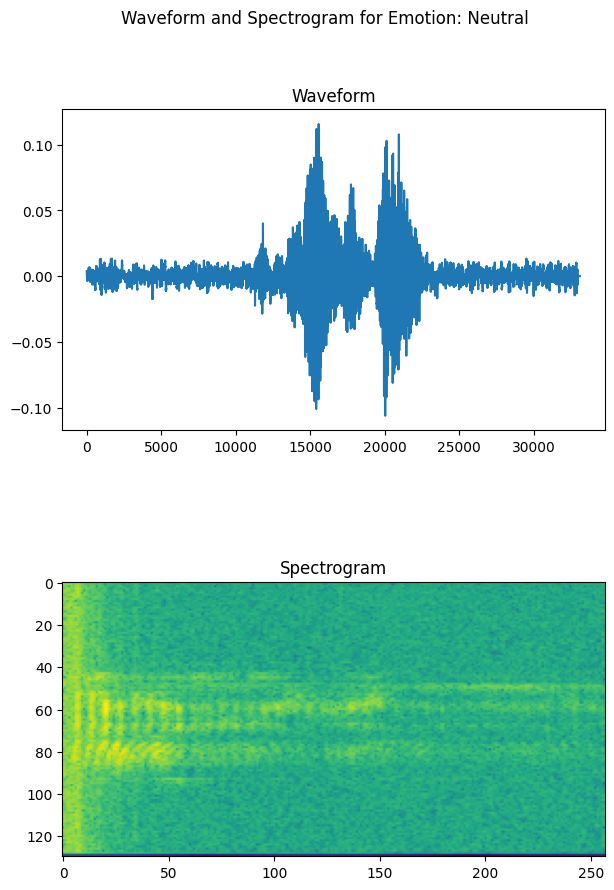

Listen Audio:


In [ ]:
#Displaying the Waveform and Spectrogram for Neutral

file_ = emotion_data.loc[emotion_data['Emotion'] == 'neutral', 'File_Path'][:1]

#calling the function
waveform_and_spectrogram(file_, 'Neutral')

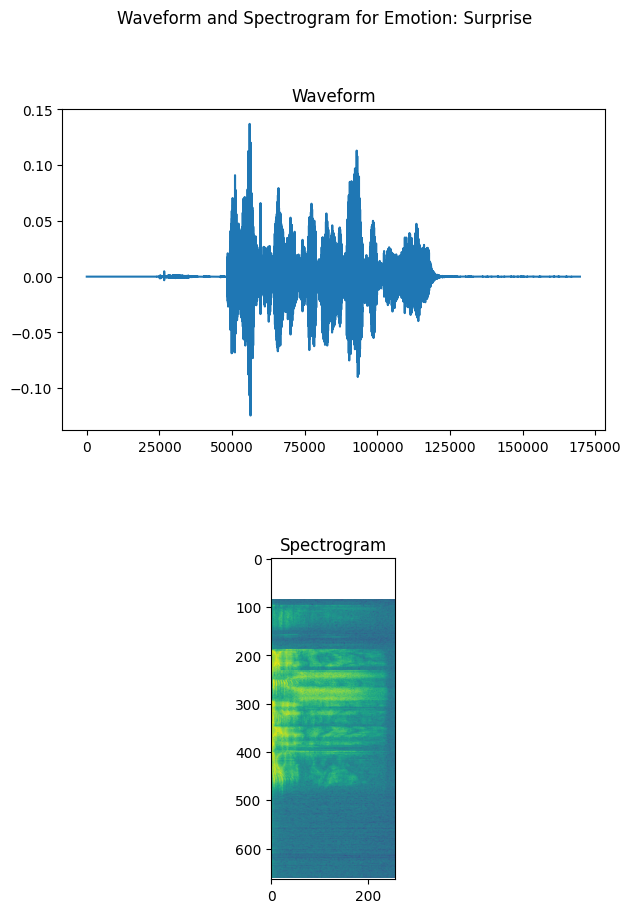

Listen Audio:


In [ ]:
#Displaying the Waveform and Spectrogram for Surprise

file_ = emotion_data.loc[emotion_data['Emotion'] == 'surprise', 'File_Path'][10:11]

#calling the function
waveform_and_spectrogram(file_, 'Surprise')

lets compare the waveplot of audio with noise and without noise.

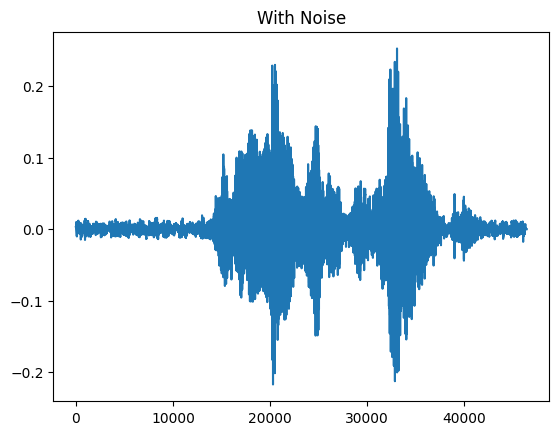

In [ ]:
#getting the file
audio_file = emotion_data.loc[emotion_data['Emotion'] == 'disgust', 'File_Path'][10:11]

audio = tfio.audio.AudioIOTensor(audio_file, dtype=tf.float32)# read the audio file
audio_tens = audio.to_tensor()# convert the audio data into tensor

# remove last dimension
audio_tens = tf.squeeze(audio_tens, axis=[-1])

#creating teh waveplot
waveform = tf.cast(audio_tens, tf.float32) / 32768.0

plt.figure()
plt.title("With Noise")
plt.plot(waveform.numpy())
Audio(waveform.numpy(), rate=audio.rate.numpy())

tf.Tensor([15188 35200], shape=(2,), dtype=int64)
tf.Tensor(15188, shape=(), dtype=int64) tf.Tensor(35200, shape=(), dtype=int64)


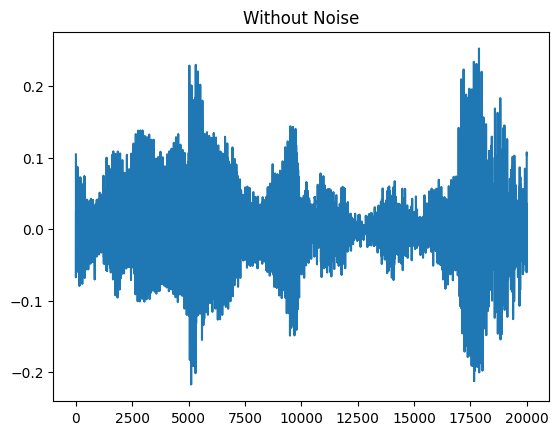

In [ ]:
position = tfio.audio.trim(waveform, axis=0, epsilon=0.1)# this API trim the noise from the audio
                                                          #and return a pair of ['START', 'STOP'] position of the segment.
print(position)

start = position[0]
stop = position[1]
print(start, stop)

processed = waveform[start:stop]

plt.figure()
plt.title("Without Noise")
plt.plot(processed.numpy())
Audio(processed.numpy(), rate=audio.rate.numpy())

The initial wave that is noise in audio is removed. but for the model it is good to ahve some noise so that it can perform well even their is noise in audio. we can also inject noise in audio if necessary.

# **Data Augmentation**

Data Augmentaion is a technique that is used to artificially increase the size of the data, composed from the original data that stores same information with variation.<br>
data augmentation can combat overfitting and improve the generalization ability of the model.<br>
It consists of applying several transformations or modifications to existing data samples, generating new samples that retain the same label or class as the original data.<br>
There are diffrent audio augmentation technique in tenserflow. we will try it and see the change in original audio.

**Creating the helper function**

In [ ]:
#reading a audio file

def read_audio(audio_file):
  audio = tfio.audio.AudioIOTensor(audio_file, dtype=tf.float32)# read the audio file
  audio_tens = audio.to_tensor()# convert the audio data into tensor

  # remove last dimension
  audio_tens = tf.squeeze(audio_tens, axis=[-1])

  return audio_tens, audio

In [ ]:
#converting the audio tensor into waveform.

def create_waveform(audio_tensor):
  waveform = tf.cast(audio_tensor, tf.float32) / 32768.0


  return waveform

In [ ]:
#converting the wave from into spectrogrma

def convert_spectro(waveform_audio):
  spectrogram = tfio.audio.spectrogram(
                                        waveform_audio,
                                        nfft=512,
                                        window=512,
                                        stride=256)
  return spectrogram

In [ ]:
#function for plotting the waveform
def plot_waveform(wave, label):
  plt.figure()
  plt.title(label)
  plt.plot(wave.numpy())

In [ ]:
#function for plotting the spectrogram

def plot_spectrogram(spectro, label):
  plt.figure()
  plt.title(label)
  plt.imshow(tf.math.log(spectro).numpy())

**1. Fade In and Fade Out**

this will gradually increase or decrease audio signal.<br>
 <b>tfio.audio.fade</b> is a API, which supports different shapes of fades such as linear, logarithmic, or exponential.

In [ ]:
#creating the functio for fade augmentation

def fade_aug(waveform_audio):
  fade = tfio.audio.fade(
                        waveform_audio,
                        fade_in=1000,
                        fade_out=3000,
                        mode="logarithmic")
  return fade

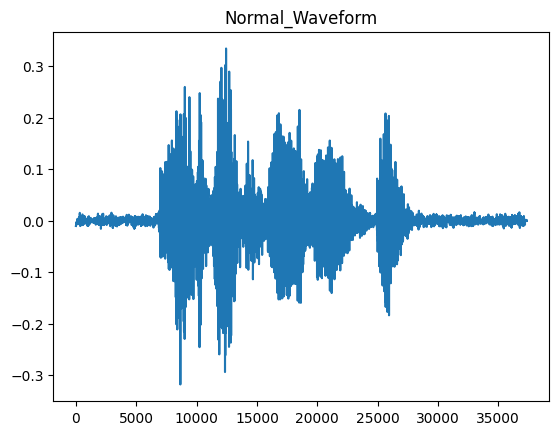

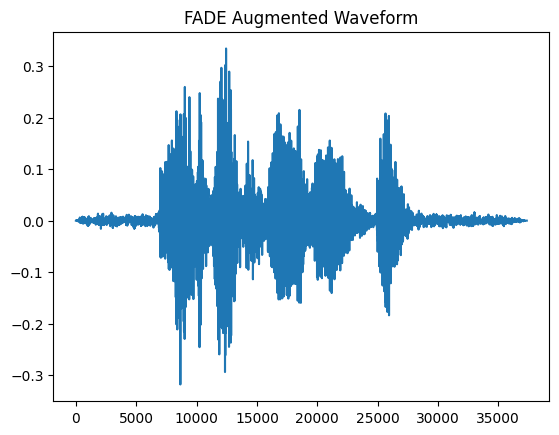

In [ ]:
#slicing the one file
audio_file = emotion_data.loc[emotion_data['Emotion'] == 'happy', 'File_Path'][20:21]

#calling the audio_file reader function
audio_tensor, audio_rate = read_audio(audio_file)
#print(audio)

#creating the waveform
wave = create_waveform(audio_tensor)

#plotting the normal waveform
plot_waveform(wave, 'Normal_Waveform')

#adding the fade augmentation in normal waveform
fade = fade_aug(wave)

#plotting the FADE Augmented waveform
plot_waveform(fade, 'FADE Augmented Waveform')


In [ ]:
Audio(wave.numpy(), rate=audio_rate.rate.numpy())

In [ ]:
Audio(fade.numpy(), rate=audio_rate.rate.numpy())

**2. Spectrogram, mel-Spectrogram and db scale mel-spectrogram**

A spectrogram is useful in pre-processing as it helps in the representation of frequencies present in the audio data.
<br>
It’s mainly helpful in sound detection, information retrieval, etc.<br>

<b>Mel spectrogram</b>
<br>Mel spectrogram is a version of the spectrogram that is scaled based on the human auditory system.<br> The mel scale is a non-linear transformation of frequency that is designed to better reflect how the human ear perceives sound.<br>
decibel-scaled version of the mel spectrogram is db scale mel-spectrogram.

Spectrograms can be used in audio augmenting techniques such as <b>time masking</b>, and <b>frequency masking.</b>

In [ ]:
def mel_spectro(spectro):
  mel = tfio.audio.melscale(spectro,#A float tensor of shape [batch_size, num_frames, num_fft_bins],
                                    #representing the input spectrogram. The input should be in a linear magnitude scale.
                            rate=16000,#An integer or float scalar representing the sample rate of the input audio signal. The default value is 16000.
                            mels=250,#An integer scalar representing the number of mel bins. The default value is 500.
                            fmin=0,#A float scalar representing the minimum frequency of the spectrogram. The default value is 0.
                            fmax=7000 #A float scalar representing the maximum frequency of the spectrogram. The default value is 8000.
                            )
  return mel

In [ ]:
def db_scaled_spectro(mel_spectro):
  db = tfio.audio.dbscale(mel_spectro,
                          top_db=70 # representing the maximum value in decibels that should be represented in the output.
                          #Any values above this threshold will be clipped to the maximum value.
                          )
  return db

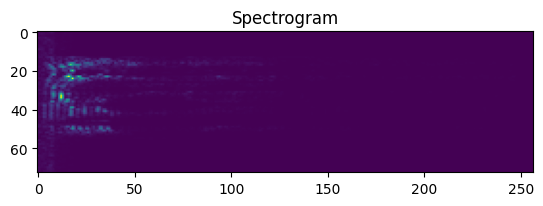

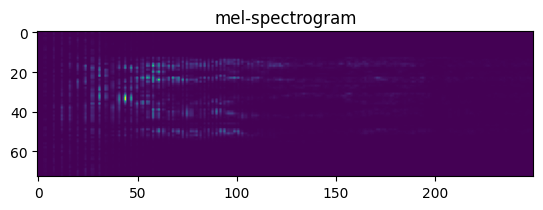

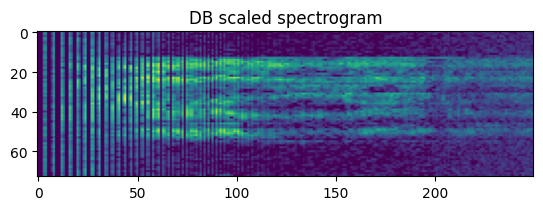

In [ ]:
#displaying the spectrogram of above audio
spec = convert_spectro(wave)

#displaying the spec
plot_spectrogram(spec, 'Spectrogram')

#let scale the spectrogram with mel-spectrogram
mel_spec = mel_spectro(spec)

#displaying the mel_spec
plot_spectrogram(mel_spec, 'mel-spectrogram')

#scaling the mel_spectro to db
db = db_scaled_spectro(mel_spec)

#displaying the db scaled specto
plot_spectrogram(db, 'DB scaled spectrogram')

**Frequency and Time masking**

Frequency masking and Time masking are audio augmentation techniques used to improve the robustness and generalization of audio models. They are based on the idea of randomly masking certain frequency bands or time steps in the audio signal to simulate real-world variations and improve the model’s ability to handle noisy or incomplete inputs.

In [ ]:
#Frequency Masking
def frequency_masking(spectrograms):
  freq_mask = tfio.audio.freq_mask(spectrograms,
                                   param=100 #applying frequency masking with a max mask width of 100 frequency bins
                                   )
  return freq_mask

In [ ]:
#Time Masking

def time_masking(spectrograms):
  time_mask = tfio.audio.time_mask(spectrograms,
                                         param=50)# time masking with 50 time step

  return time_mask

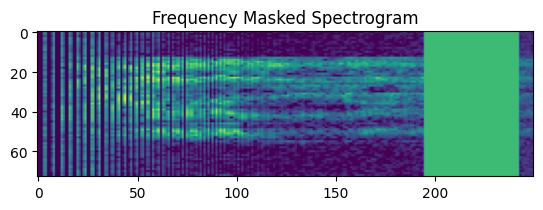

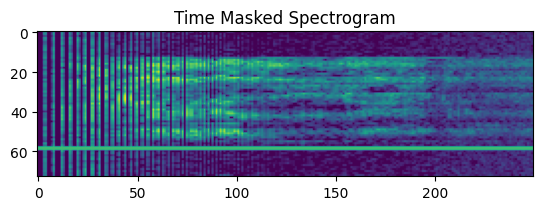

In [ ]:
#Applying the masking techniques on db scaled spectrogram

freq_mask = frequency_masking(db)

#displaying the freq_mask
plot_spectrogram(freq_mask, 'Frequency Masked Spectrogram')

#time masking
time_mask = time_masking(db)

#displaying the time masking
plot_spectrogram(time_mask, 'Time Masked Spectrogram')
